# 1. 模型调用的分类
角度1：按照模型功能的不同
- 非对话模型： （LLM、Text Model）
- 对话模型： （Chat Models）（推荐）
- 嵌入模型： （Embedding Models）（在RAG中使用）

角度2：按照模型调用时，参数书写的位置的不同（api-key、base_url、model-name）

- 硬编码的方式：将参数书写在代码中
- 使用环境变量的方式
- 使用配置文件的方式（推荐）

角度3：具体API的调用

- 使用LangChain 提供的API（推荐）
- 使用OpenAI 官方的API
- 使用其他平台、大模型自家（这些会对OpenAI有一定的参考）提供的API

# 2.角度1：非对话模型

In [1]:
import os
import dotenv
from langchain_openai import OpenAI

dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

###########核心代码############
llm = OpenAI()  # 获取非对话模型
str = llm.invoke("写一首关于春天的诗")  # 直接输入字符串  # 传入一个字符串作为输入
print(str)

AuthenticationError: Error code: 401 - {'error': {'message': '无效的sk token，请检查token是否正确', 'type': 'error'}}

# 2.角度1：对话模型

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage
import os
import dotenv

dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")
########核心代码############
chat_model = ChatOpenAI(model="gpt-4o-mini")
messages = [
    SystemMessage(content="我是人工智能助手，我叫小智"),
    HumanMessage(content="你好，我是小明，很高兴认识你")
]
# 输入list【basemessage】
# 输出： AIMessage
response = chat_model.invoke(messages)  # 输入消息列表
print(type(response))  # <class 'langchain_core.messages.ai.AIMessage'>
print(response.content)

# 2.角度1：EmbeddingModel（嵌入模型）

In [ ]:
import dotenv
from langchain_openai import OpenAIEmbeddings

dotenv.load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
#############
embeddings_model = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)
res1 = embeddings_model.embed_query('我是文档中的数据')
print(res1)
# 打印结果：[-0.004306625574827194, 0.003083756659179926, -0.013916781172156334, ...., ]

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

#  3.角度2：参数位置不同举例
## 必要参数：
1）必须设置的参数：
- base_url ：大模型 API 服务的根地址
- api_key ：用于身份验证的密钥，由大模型服务商（如 OpenAI、百度千帆）提供
- model/model_name ：指定要调用的具体大模型名称（如 gpt-4-turbo 、 ERNIE-3.5-8K 等）

2）其它参数：
- temperature ：控制生成文本的“随机性”，取值范围为0～1。
    - 值越低 → 输出越确定、保守（适合事实回答）
    - 值越高 → 输出越多样、有创意（适合创意写作）
  
  通常，根据需要设置如下：

    - 精确模式（0.5或更低）：生成的文本更加安全可靠，但可能缺乏创意和多样性。
    - 平衡模式（通常是0.8）：生成的文本通常既有一定的多样性，又能保持较好的连贯性和准确性。
    - 创意模式（通常是1）：生成的文本更有创意，但也更容易出现语法错误或不合逻辑的内容。
  
- max_tokens ：限制生成文本的最大长度，防止输出过长。

**Token是什么？**

**基本单位** : 大模型处理文本的最小单位是token（相当于自然语言中的词或字），输出时逐个token依次生成。

**收费依据** ：大语言模型(LLM)通常也是以token的数量作为其计量(或收费)的依据。
  - 1个Token≈1-1.8个汉字，1个Token≈3-4个英文字母
  - Token与字符转化的可视化工具：
    - OpenAI提供：https://platform.openai.com/tokenizer
    - 百度智能云提供：https://console.bce.baidu.com/support/#/tokenizer

**max_tokens设置建议：**
  - 客服短回复：128-256。比如：生成一句客服回复（如“订单已发货，预计明天送达”）
  - 常规对话、多轮对话：512-1024
  - 长内容生成：1024-4096。比如：生成一篇产品说明书（包含功能、使用方法等结构）
3.1 硬编码的方式
以对话模型为例

In [ ]:
# 从 langchain_openai 库中导入 ChatOpenAI 类
# 这个类是 LangChain 对 OpenAI API 对话模型的封装
from langchain_openai import ChatOpenAI

# 实例化 ChatOpenAI 对象
# 即使是“非对话模型”（如老的 text-davinci 系列），在现代开发中也建议通过此接口调用其 Chat 版本
chat_model = ChatOpenAI(
    # 1. model_name: 指定使用的模型 ID
    # 例如 "gpt-3.5-turbo" 或 "gpt-4o"。如果不设置，通常默认使用 gpt-3.5-turbo
    model_name="gpt-3.5-turbo",

    # 2. base_url: API 的访问地址
    # 如果使用 OpenAI 官方服务，可以不填；如果使用中转 API 或本地大模型（如 Ollama），则需在此填入地址
    # /v1是官方要求加上的后缀
    base_url="https://api.openai.com/v1",

    # 3. api_key: 你的身份验证密钥
    # 必须填入有效的 API Key 才能获得响应
    api_key="your_api_key_here",
)

# 调用流程解释：
# .invoke() 是 LangChain 的标准调用方法（Runnable 接口）
# 它会将你的字符串包装成一个消息对象（HumanMessage）发送给后端 API
response = chat_model.invoke("解释神经网络原理")

# response 是一个 BaseMessage 对象（通常是 AIMessage）
# .content 属性提取了模型生成的纯文本内容
print(response.content)

演示非对话模型

In [ ]:
# 注意：这里导入的是 OpenAI，而不是 ChatOpenAI
from langchain_openai import OpenAI

# 实例化非对话模型对象
llm = OpenAI(
    # 1. model_name: 必须使用支持 Completion 接口的模型
    # 注意：gpt-4 和 大部分 gpt-3.5 现在都是对话模型，
    # 只有特定的 -instruct 后缀模型才支持这种调用方式。
    model_name="gpt-3.5-turbo-instruct",

    # 2. base_url 和 api_key 的作用与之前一致
    base_url="https://api.openai.com/v1",
    api_key="your_api_key_here",

    # 非对话模型通常会调整的参数：控制随机性
    temperature=0.7
)

# 调用流程：
# 对于非对话模型，invoke 接收的是纯字符串（Prompt），返回的也是字符串（或类似对象）
# 它不会像 Chat 模型那样在后台把你的输入封装成 [{"role": "user", ...}]
response = llm.invoke("解释神经网络原理")

# 直接打印输出（在 OpenAI 类中，invoke 返回结果通常直接包含文本）
print(response)

3.2 配置环境变量

- 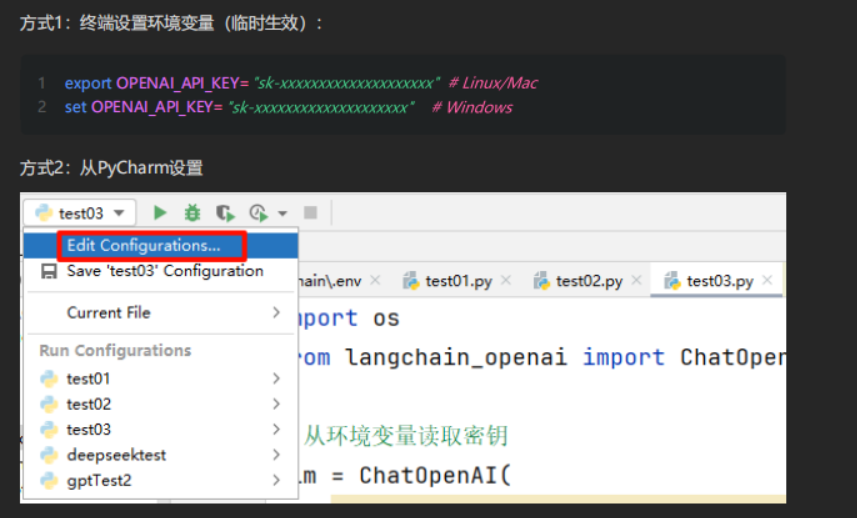
- 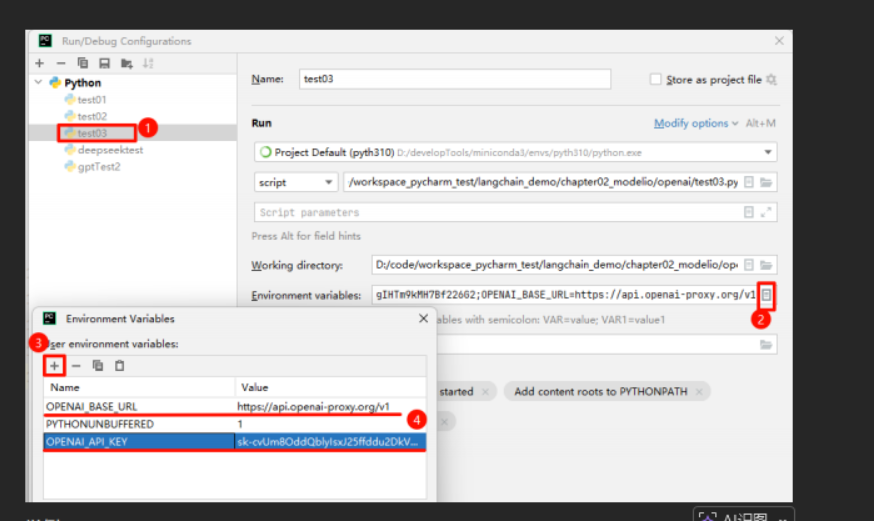

In [ ]:
import os
from langchain_openai import ChatOpenAI

# 从环境变量读取密钥
llm = ChatOpenAI(
    api_key=os.environ["OPENAI_API_KEY"],  # 动态获取
    base_url=os.environ["OPENAI_BASE_URL"],
    model="gpt-4o-mini",
)
response = llm.invoke("LangChain 是什么？")
print(response.content)

3.3 使用.env配置文件
使用 python-dotenv 加载本地配置文件，支持多环境管理（开发/生产）。

方式一：

In [ ]:
import os  # 用于操作系统级的功能，如读取环境变量
from dotenv import load_dotenv  # 用于从本地 .env 文件加载环境变量到内存
from langchain_openai import ChatOpenAI  # LangChain 提供的 OpenAI 模型封装类

# 1. 环境准备阶段
# load_dotenv() 会在当前项目根目录下寻找名为 .env 的文件
# 并将其中的键值对（如 OPENAI_API_KEY=sk-xxx）读取为系统的环境变量
# 这样你就不需要把真实的 Key 写在代码里，防止代码上传到 GitHub 后泄露 Key
load_dotenv()

# 2. 实例化模型阶段
# 使用 ChatOpenAI 类创建一个 llm 对象（Large Language Model）
llm = ChatOpenAI(
    # os.getenv("变量名")：从系统环境中获取对应的值
    # 如果 .env 文件里配置正确，这里能拿到真实的 Key
    api_key=os.getenv("OPENAI_API_KEY"),  # 身份验证：证明你是付费用户
    # base_url 是请求发送的地址。如果是官方库直连可省略，
    # 但如果你使用了代理或中转服务，必须通过环境变量指定该地址
    base_url=os.getenv("OPENAI_BASE_URL"),
    # 指定使用的模型名称。gpt-4o-mini 是目前性价比极高的轻量级模型
    model="gpt-4o-mini",
    # temperature（采样温度）：控制回复的“随机性”或“创造力”
    # 0.7 适合写小说、创意写作；如果做数学题或提取信息，建议设为 0 或 0.1
    temperature=0.7,
)

# 3. 执行调用阶段
# invoke 方法是 LangChain 的标准执行接口
# 它会把你的字符串转换成模型能理解的消息格式，并发起网络请求
# 这里你的提问是 "RAG 技术的核心流程"
response = llm.invoke("RAG 技术的核心流程")

# 4. 结果展示阶段
# response 是一个对象（AIMessage），包含了模型回复的所有信息（时间、字数、内容等）
# .content 属性是其中最核心的部分：即模型生成的文本内容
print(response.content)

方式二：

In [ ]:
from langchain_openai import ChatOpenAI
import dotenv
import os

# 1. 加载配置：从项目根目录的 .env 文件中读取键值对
dotenv.load_dotenv()

# 2. 映射环境变量：
# LangChain 的底层代码默认会寻找名为 "OPENAI_API_KEY" 和 "OPENAI_API_BASE" 的变量
# 这里通过 os.environ 将你自定义的变量名（如 OPENAI_API_KEY1）映射到标准变量名上
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_API_BASE"] = os.getenv("OPENAI_BASE_URL")

# 3. 定义输入文本
text = "猫王是猫吗？"

# 4. 实例化模型（隐式调用）：
# 注意：这里没有写 api_key=... 和 base_url=...
# ChatOpenAI 在初始化时会自动检测 os.environ 中是否存在 "OPENAI_API_KEY"
chat_model = ChatOpenAI(
    model="gpt-4o-mini",   # 指定模型
    temperature=0.7,       # 回复的随机性，0.7 属于比较有创造力的水平
    max_tokens=300,        # 限制模型输出的最大长度（Token数），防止消耗过多额度
)

# 5. 执行调用：
# 这一步会将 text 包装成 HumanMessage 并发送给远程服务器
response = chat_model.invoke(text)

# 6. 结果处理：
# 打印返回对象的类型。在 LangChain 中，对话模型通常返回 langchain_core.messages.ai.AIMessage
print(type(response)) 

# 打印具体的回复文本内容
print(response.content)

# 4.角度3（了解去看笔记）

In [11]:
from openai import OpenAI
import dotenv
import os

# 1. 加载配置：从项目根目录的 .env 文件中读取键值对
dotenv.load_dotenv()

# 2. 映射环境变量：
# LangChain 的底层代码默认会寻找名为 "OPENAI_API_KEY" 和 "OPENAI_API_BASE" 的变量
# 这里通过 os.environ 将你自定义的变量名（如 OPENAI_API_KEY1）映射到标准变量名上
os.environ["SILICON_FLOW_API_KEY"] = os.getenv("SILICON_FLOW_API_KEY")
os.environ["SILICON_FLOW_BASE_URL"] = os.getenv("SILICON_FLOW_BASE_URL")
client = OpenAI(
    api_key=os.getenv("SILICON_FLOW_API_KEY"),
    base_url=os.getenv("SILICON_FLOW_BASE_URL"),
)

response = client.chat.completions.create(
    model="Qwen/Qwen3-8B",
    messages=[
        {"role": "system", "content": "你是一个有用的助手"},
        {"role": "user", "content": "你好，请介绍一下你自己"},
    ],
)
print(response.choices[0].message.content)

你好！我是一个大型语言模型，名字是通义千问。我是阿里巴巴集团旗下的通义实验室自主研发的，能够进行多种语言的理解和生成，包括中文、英文、日文等。我的功能涵盖了回答问题、创作文字、编程、逻辑推理等多个方面，旨在为用户提供全面的帮助和支持。

我具备强大的语言理解和生成能力，可以通过对话理解用户的意图，并根据需要提供相应的信息和帮助。我的训练数据来自于互联网上的大量文本，因此我能够掌握广泛的知识，并且在多种任务中表现出色。

如果你有任何问题或需要帮助的地方，都可以告诉我，我会尽力为你提供准确和有用的信息。让我们开始吧！😊
